### Setup

In [57]:
import os
import osmnx as ox
import networkx as nx
from graph_search import *
import networkx as nx

In [58]:
# if using this case visualization will not work
import pickle

with open("/Users/armanmacbook/Downloads/graphs/armenia_cities.pkl", "rb") as f:
    G = pickle.load(f)

In [ ]:
# ----- Build toy MultiGraph -----
PLACE = "Kentron, Yerevan, Armenia"   # small; fast for smoke tests
NETWORK = "drive"

# ---------- download (simplify=True by default here) ----------
G = ox.graph.graph_from_place(PLACE, network_type=NETWORK, simplify=True)

# keep only the largest connected component (weak is fine for roads)
G = ox.truncate.largest_component(G, strongly=False)

keep_node = {"x", "y", "street_count"}
keep_edge = {"length", "highway", "name", "maxspeed"}

for _, d in G.nodes(data=True):
    for k in list(d.keys()):
        if k not in keep_node:
            d.pop(k, None)

for u, v, k, d in G.edges(keys=True, data=True):
    for kk in list(d.keys()):
        if kk not in keep_edge:
            d.pop(kk, None)
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

### UCS

In [ ]:
start_node_id = list(G.nodes)[0]  #'Maralik'
goal_node_id = list(G.nodes)[564] #'Vagharshapat'
initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)
ucs = UCSGraphSearch()
solution = ucs.find_solution(initial, goal_test)

In [27]:
if solution:
    path = extract_node_id_path(solution)

    print("Solution path:", path)
    print("Total cost (meters):", solution.path_cost)
    print("Nodes expanded:", ucs._number_of_nodes)
else:
    print("No solution found.")

Solution path: ['Maralik', 'Haykasar', 'Hayrenyats', 'Saratak', 'Lusakert', 'Beniamin', 'Azatan', 'Gharibjanyan', 'Gyumri', 'Akhuryan', 'Kamo', 'Khnkoyan', 'Hartagyugh', 'Mets Parni']
Total cost (meters): 73314.29569040274
Nodes expanded: 225


### A* Search

In [29]:
# Pick valid start and goal nodes
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[564]

initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)

# Build heuristic h(state)
h = build_euclidean_heuristic(G, goal_node_id)

# Run A* graph search
astar = AStarGraphSearch()
solution_astar = astar.find_solution(initial, goal_test, h)

In [27]:
# Pick valid start and goal nodes
goal_node_id = list(G.nodes)[0]
start_node_id = list(G.nodes)[564]

initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)

# Build heuristic h(state)
h = build_euclidean_heuristic(G, goal_node_id)

# Run A* graph search
astar = AStarGraphSearch()
solution_astar = astar.find_solution(initial, goal_test, h)

In [30]:
# ----- Print path -----
if solution_astar:
    path = extract_node_id_path(solution_astar)

    print("Solution path:", path)
    print("Total cost (meters):", solution_astar.path_cost)
    print("Nodes expanded:", astar.get_expanded_node_count())
else:
    print("No solution found.")

Solution path: [256031437, 5026483106, 5026483105, 5009318171, 10831681874, 1475774820, 1807998351, 5118314365, 10831688447, 8913362246, 5035725114, 5026483107, 9280261372, 5489385514, 9227012882, 5489385511, 5450648349, 4296905827, 12593950281, 10970452605, 407729613, 632031882, 6277581589, 2420195983, 6277581586, 6277581587, 3831529185, 11648601295, 11648561414, 11648561419, 11648561420, 11644940327, 11648561426, 11648561428, 407729599, 1970926499, 4110471701, 4110471700, 4234582615]
Total cost (meters): 3593.731
Nodes expanded: 117


In [24]:
# ----- Print path -----
if solution_astar:
    path = extract_node_id_path(solution_astar)

    print("Solution path:", path)
    print("Total cost (meters):", solution_astar.path_cost)
    print("Nodes expanded:", astar.get_expanded_node_count())
else:
    print("No solution found.")

Solution path: [4234582615, 3839031476, 3839031475, 632031939, 10852700972, 1465088491, 4854142865, 4854142864, 2271368456, 287884652, 11648601301, 1463895526, 406385842, 311009806, 5086900431, 4688983926, 354684596, 354684574, 354684572, 406386249, 354684635, 10970452622, 4754078149, 406387734, 6317240542, 9280261381, 5035725120, 5035725121, 3836999108, 8913362243, 10831688468, 10831688467, 10831688448, 1446420597, 2600535456, 5009318172, 256031437]
Total cost (meters): 3284.4599999999987
Nodes expanded: 125


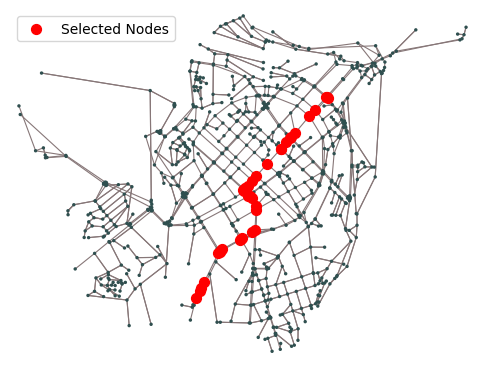

In [25]:
x_coords = [G.nodes[n]["x"] for n in path if n in G.nodes]
y_coords = [G.nodes[n]["y"] for n in path if n in G.nodes]

# replot with highlight
fig, ax = ox.plot.plot_graph(
    G,
    figsize=(6, 6),
    bgcolor="white",
    node_color="#2f4f4f",
    node_size=6,
    edge_color="#877778",
    edge_linewidth=0.8,
    show=False,
    close=False,
)

# plot the chosen nodes in red
ax.scatter(x_coords, y_coords, c="red", s=50, zorder=5, label="Selected Nodes")
ax.legend()

### Bidirectional Search

In [19]:
# Pick valid start and goal nodes
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[5]

initial = GraphState(G, start_node_id)
goal_test = SimpleGoalTest(goal_node_id)

# Run Bidirectional graph search
bidirectional = BidirectionalGraphSearch()
solution_bidirectional = bidirectional.find_solution(initial, goal_test)

In [5]:
# ----- Print path -----
if solution_bidirectional:
    path = extract_node_id_path(solution_bidirectional)
    print("Solution path:", path)
    print("Total cost (meters):", solution_bidirectional.path_cost)
    print("Nodes expanded:", bidirectional.get_expanded_node_count())
else:
    print("No solution found.")

Solution path: ['Maralik', 'Talin', 'Armavir', 'Vagharshapat']
Total cost (meters): 96046.54607421579
Nodes expanded: 27


In [7]:
# x_coords = [G.nodes[n]["x"] for n in path if n in G.nodes]
# y_coords = [G.nodes[n]["y"] for n in path if n in G.nodes]

# # replot with highlight
# fig, ax = ox.plot.plot_graph(
#     G,
#     figsize=(6, 6),
#     bgcolor="white",
#     node_color="#2f4f4f",
#     node_size=6,
#     edge_color="#877778",
#     edge_linewidth=0.8,
#     show=False,
#     close=False,
# )

# # plot the chosen nodes in red
# ax.scatter(x_coords, y_coords, c="red", s=50, zorder=5, label="Selected Nodes")
# ax.legend()

### DLitteSearch

In [7]:
def plot_graph_with_path(
    G,
    path,
    node_color="red",
    edge_color="red",
    blocked_edges=None,
    blocked_color="orange",
    blocked_width=3
):
    """
    G             : OSMnx/NetworkX graph
    path          : list of node IDs representing the selected path
    blocked_edges : set of (u, v) pairs (order does not matter)
    blocked_color : color for blocked edges
    blocked_width : linewidth for blocked edges
    """

    # --- 1) Base graph plot ---
    fig, ax = ox.plot.plot_graph(
        G,
        figsize=(6, 6),
        bgcolor="white",
        node_color="#2f4f4f",
        node_size=6,
        edge_color="#877778",
        edge_linewidth=0.8,
        show=False,
        close=False,
    )

    # --- 2) Plot path nodes ---
    x_coords = [G.nodes[n]["x"] for n in path]
    y_coords = [G.nodes[n]["y"] for n in path]
    ax.scatter(x_coords, y_coords, c=node_color, s=50, zorder=6)

    # --- 3) Plot path edges ---
    ax.plot(x_coords, y_coords, color=edge_color, linewidth=3, zorder=5)

    # --- 4) Plot blocked edges ---
    if blocked_edges:
        # Make blocked_edges order-insensitive
        blocked_set = {(u, v) for u, v in blocked_edges} | {(v, u) for u, v in blocked_edges}

        for u, v, data in G.edges(keys=False, data=True):
            if (u, v) in blocked_set:
                # If the edge has geometry, draw it accurately
                if "geometry" in data:
                    xs, ys = data["geometry"].xy
                else:
                    xs = [G.nodes[u]["x"], G.nodes[v]["x"]]
                    ys = [G.nodes[u]["y"], G.nodes[v]["y"]]

                ax.plot(
                    xs,
                    ys,
                    color=blocked_color,
                    linewidth=blocked_width,
                    alpha=0.9,
                    zorder=7,
                )

    return fig, ax


In [59]:
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[10]
dlit = DStarSearch(G, start_node_id, goal_node_id, edge_cost_changer=EdgeCostChanger(G)) #no edge cost occurs
 #change edge list will return none as no edge is beign changed
path, chaned_edge_list, nodes_expanded = dlit.main()

Path Cost: 226491.63375220558


In [50]:
path

['Maralik',
 'Talin',
 'Armavir',
 'Metsamor',
 'Ashtarak',
 'Yeghvard',
 'Nor Hachin',
 'Charentsavan',
 'Hrazdan',
 'Dilijan']

In [23]:
nodes_expanded

20

In [51]:
node_to_block = 'Armavir'

In [52]:
scheduler = EdgeCostChanger(G, node_to_block, radius=1, time_to_block=0, factor=100)

In [ ]:
# start_node_id = list(G.nodes)[0]
# goal_node_id = list(G.nodes)[564]
# dlit = DStarSearch(G, start_node_id, goal_node_id, edge_cost_changer=scheduler) #no edge cost occurs
# path, chaned_edge_list, nodes_expanded = dlit.main()  #change edge list will return none as no edge is beign changed

IndexError: list index out of range

In [53]:
start_node_id = list(G.nodes)[0]
goal_node_id = list(G.nodes)[10]
dlit = DStarSearch(G, start_node_id, goal_node_id, edge_cost_changer=scheduler) #no edge cost occurs
path, chaned_edge_list, nodes_expanded = dlit.main()

Path Cost: 3127386.050789069


In [55]:
path

['Maralik',
 'Talin',
 'Maralik',
 'Gyumri',
 'Spitak',
 'Aparan',
 'Tsakhkadzor',
 'Dilijan']

(<Figure size 600x600 with 1 Axes>, <Axes: >)

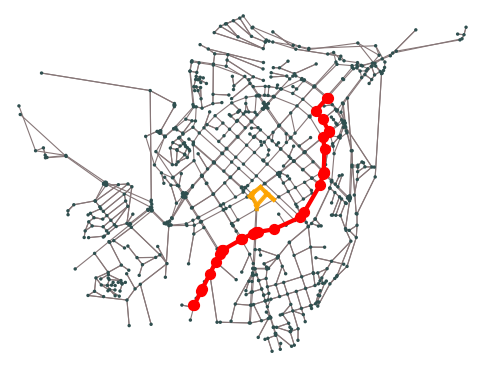

In [51]:
plot_graph_with_path(G, path, blocked_edges=chaned_edge_list)